In [3]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing and normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Imported the needed libraries 

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

Read the csv file

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we are having passengerID , Survived,PClass,Name ,SEX,AGE,SIBSP,Parch,Ticket,Cabin and embarked columns

In [6]:
df.shape

(891, 12)

There are 891 rows and 12 columns in this data set

In [7]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],inplace=True)

We removed the unwanted columns passenger ID, Name,Ticket and cabin

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


All columns are fine but in Age column, we have nan values

In [10]:
df['Age'].isnull().sum()

177

There are 177 null values in Age column.

In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)

We replaced nan values with median values

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


All columns are fine now

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


We are having sex and Embarked column as string

In [15]:
lab_enc=LabelEncoder()

In [16]:
df1=lab_enc.fit_transform(df['Sex'])


In [17]:
pd.Series(df1)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int32

In [18]:
df['Sex']=df1

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


With label encoder , we replaed sex with 0 and 1

In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

There are nan values in embarked column as well 

In [21]:
df['Embarked'].isnull().sum()

2

In [22]:
df.dropna(inplace=True)

Droped the 2 rows with embarked null values

In [24]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df2=lab_enc.fit_transform(df['Embarked'])


In [26]:
pd.Series(df2)
df['Embarked']=df2

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


usig the label encoder, changed the embarked values as well

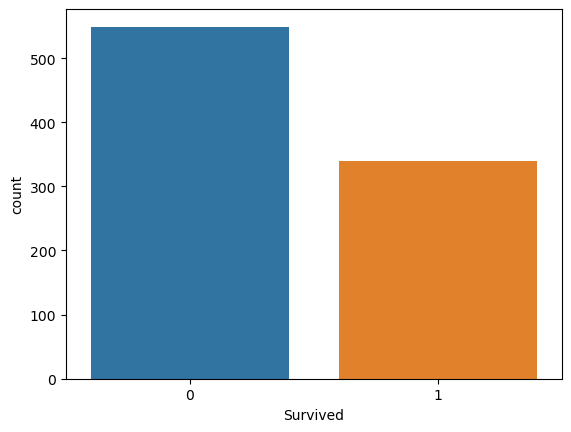

In [27]:
sns.countplot(x='Survived', data=df)
plt.show()


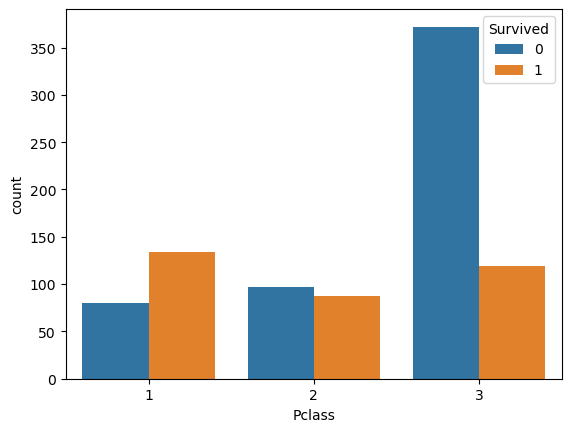

In [29]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

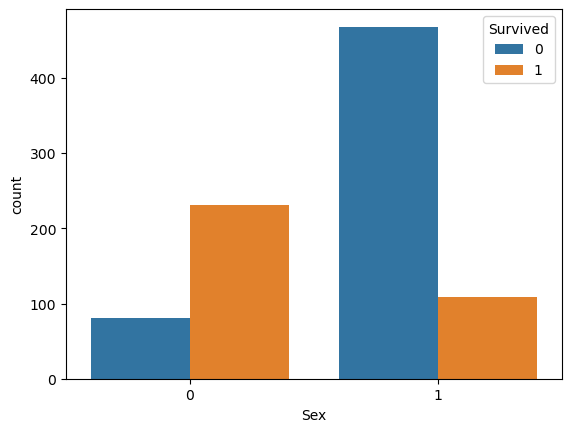

In [30]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()


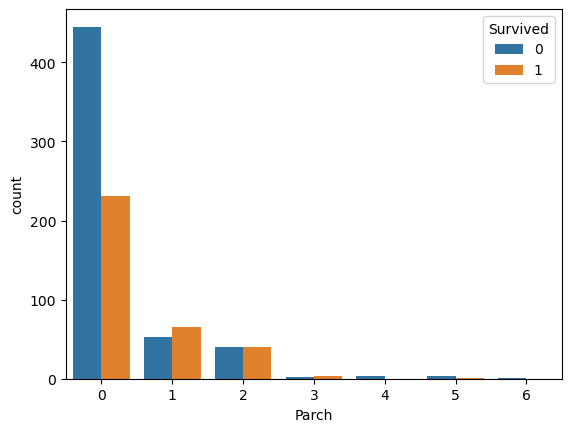

In [31]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.show()

We plotted the count plot between the features and target 

In [32]:
x=df.drop(columns=['Survived'])
y=df['Survived']

Seperated target and feature

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=56)

Splitted train and test data

In [34]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n==========================Train Result=====================')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('\n==========================Test Result=====================')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        
        print('\n\n Test classifiaction report\n',classification_report(y_test,pred,digits=2))

In [35]:
random_clf=RandomForestClassifier()

random_clf.fit(x_train,y_train)

RandomForestClassifier()

Built a model

In [36]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


==========================Train Result=====================
Accuracy score:98.20%

==========================Test Result=====================
Accuracy score:80.27%


 Test classifiaction report
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       138
           1       0.75      0.72      0.73        85

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



We got the accuracy score 80.27 % 